In [1]:
%matplotlib notebook

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
housing_df = pd.read_csv("Resources/DC_Properties.csv")
housing_df2 = housing_df.drop(["Unnamed: 0", "BLDG_NUM", "NATIONALGRID", "X", "Y"], axis=1)
housing_df2['YEAR'] = pd.DatetimeIndex(housing_df2['SALEDATE']).year
housing_df2['MONTH'] = pd.DatetimeIndex(housing_df2['SALEDATE']).month
hdf3 = housing_df2.loc[housing_df2['SOURCE'] == 'Residential', : ]
hdf4 = hdf3.dropna(subset=['PRICE'])
hdf5 = hdf4.loc[hdf4['YEAR']> 1991, : ]
hdf6 = hdf5.loc[hdf5['YEAR']< 2018, : ]
hdf7 = hdf6[hdf6.FULLADDRESS != '10 N STREET SW']
housing1 = hdf7

C:\Users\djhon\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
#hdf7.to_csv('HousingDataTrim10Street.csv')

In [4]:
NEp1 = housing1.loc[housing1['QUADRANT'] == 'NE', ['QUADRANT','PRICE','YEAR']]
NEp = NEp1.groupby('YEAR')['PRICE'].mean().round(0)

NWp1 = housing1.loc[housing1['QUADRANT'] == 'NW', ['QUADRANT','PRICE','YEAR']]
NWp = NWp1.groupby('YEAR')['PRICE'].mean().round(0)

SEp1 = housing1.loc[housing1['QUADRANT'] == 'SE', ['QUADRANT','PRICE','YEAR']]
SEp = SEp1.groupby('YEAR')['PRICE'].mean().round(0)

SWp1 = housing1.loc[housing1['QUADRANT'] == 'SW', ['QUADRANT','PRICE','YEAR']]
SWp = SWp1.groupby('YEAR')['PRICE'].mean().round(0)

<IPython.core.display.Javascript object>


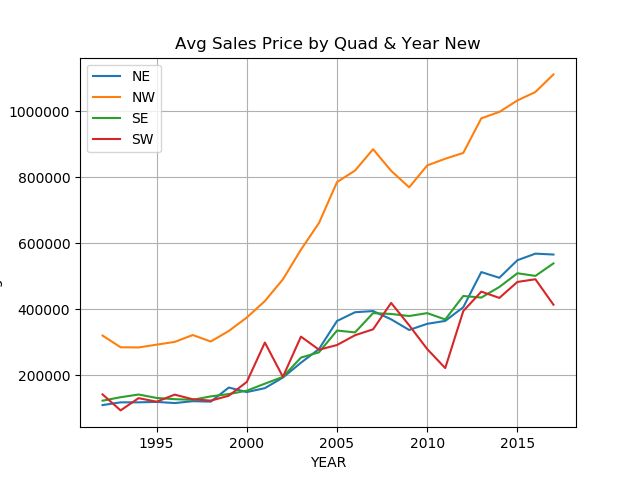

In [5]:
line_chart = NEp.plot(kind="line", label='NE', title="Avg Sales Price by Quad & Year New")
line_chart = NWp.plot(kind="line", label='NW')
line_chart = SEp.plot(kind="line", label='SE')
line_chart = SWp.plot(kind="line", label='SW')

plt.grid()
line_chart.set_xlabel("YEAR")
line_chart.set_ylabel("Avg Price of Sales")
plt.legend(loc="best")
plt.savefig('DH_Images/AvgPriceofSalesbyQuad&YearNew.png')
plt.show()